In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [20]:
# Load the JSON file to analyze it for visualizations and correlation/regression analysis
file_path = 'driver_income.json'
data = pd.read_json(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,vehicle_id,tenure,ownership,avg_passenger,avg_milage_normalized,avg_duration,avg_distance_normalized,income
0,13006009578909,3,rent,2.114440,2.078768,0.211278,6.556613,22709.945569
1,358240053414231,2,rent,10.734419,0.504001,1.655938,0.815652,1494.552909
2,12336004843938,3,rent,0.796991,0.640769,1.558425,0.633661,56072.370862
3,12336009883541,4,rent,15.917807,0.323527,0.359985,2.257998,95292.025064
4,353285047053830,4,own,6.402184,1.825980,0.593083,0.780963,23822.013274


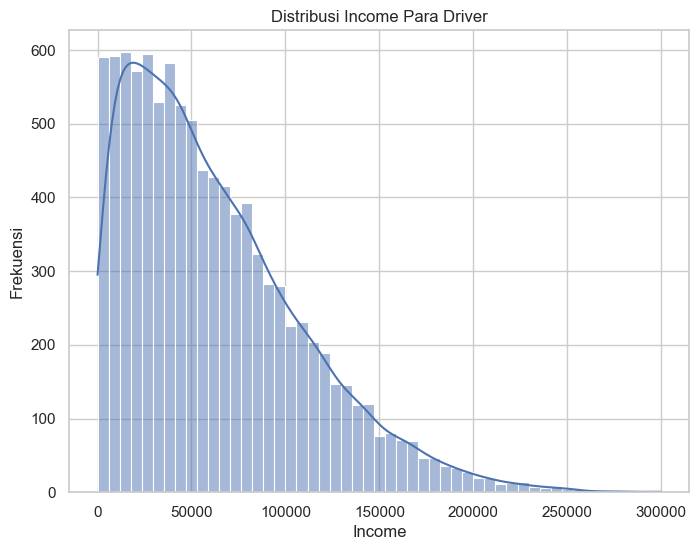

In [21]:
# Histogram Distributiin Income
plt.figure(figsize=(8, 6))
sns.histplot(data['income'], kde=True)
plt.title("Distribusi Income Para Driver")
plt.xlabel("Income")
plt.ylabel("Frekuensi")
plt.show()

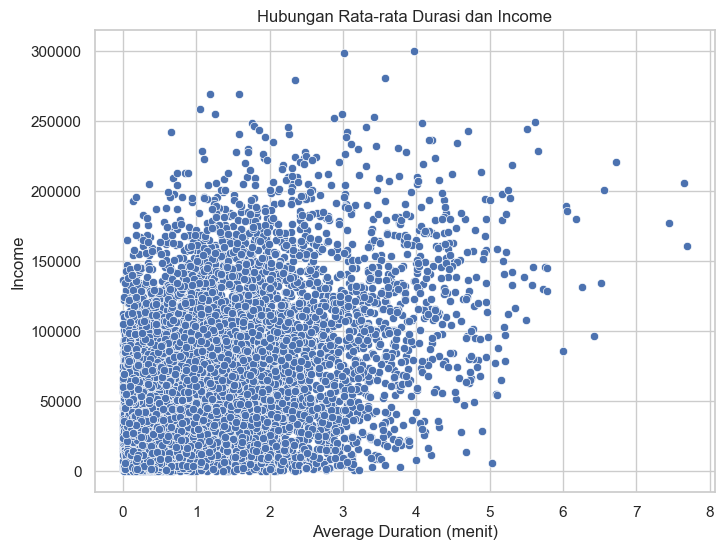

In [22]:
# Scatter plot for Avg_duration and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_duration', y='income', data=data)
plt.title("Hubungan Rata-rata Durasi dan Income")
plt.xlabel("Average Duration (menit)")
plt.ylabel("Income")
plt.show()

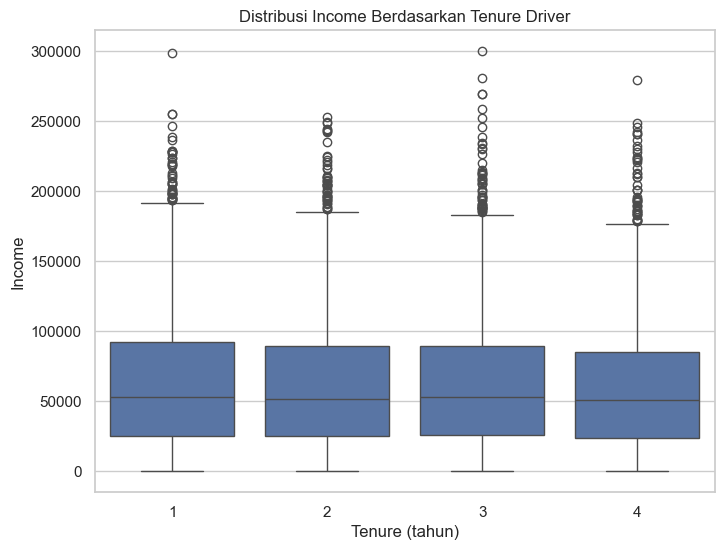

In [23]:
# Box Plot for tenure and income
plt.figure(figsize=(8, 6))
sns.boxplot(x='tenure', y='income', data=data)
plt.title("Distribusi Income Berdasarkan Tenure Driver")
plt.xlabel("Tenure (tahun)")
plt.ylabel("Income")
plt.show()

In [24]:
# Perform correlation analysis
correlation_matrix = data[['tenure', 'avg_passenger', 'avg_duration', 'income']].corr()

# Display the correlation matrix
correlation_matrix

,tenure,avg_passenger,avg_duration,income
tenure,1.000000,-0.014395,-0.010146,-0.023834
avg_passenger,-0.014395,1.000000,-0.004374,0.367903
avg_duration,-0.010146,-0.004374,1.000000,0.390323
income,-0.023834,0.367903,0.390323,1.000000


In [25]:
# Select features and target
X = data[['tenure', 'avg_passenger', 'avg_duration']]
y = data['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)

# Get coefficients
coefficients = model.coef_
print("Coefficients:", coefficients)

Coefficients: [ -591.23879811  2486.95279185 18305.05957917]
